In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [127]:
df = pd.read_csv('D:\mymoviedb.csv', lineterminator = '\n')

<>:1: SyntaxWarning: invalid escape sequence '\m'
<>:1: SyntaxWarning: invalid escape sequence '\m'
C:\Users\dhruv\AppData\Local\Temp\ipykernel_7404\1051039496.py:1: SyntaxWarning: invalid escape sequence '\m'
  df = pd.read_csv('D:\mymoviedb.csv', lineterminator = '\n')


In [128]:
df.head()

,Release_Date,Title,Overview,Popularity,Vote_Count,Vote_Average,Original_Language,Genre,Poster_Url
0,2021-12-15,Spider-Man: No Way Home,Peter Parker is unmasked and no longer able to...,5083.954,8940,8.3,en,"Action, Adventure, Science Fiction",https://image.tmdb.org/t/p/original/1g0dhYtq4i...
1,2022-03-01,The Batman,"In his second year of fighting crime, Batman u...",3827.658,1151,8.1,en,"Crime, Mystery, Thriller",https://image.tmdb.org/t/p/original/74xTEgt7R3...
2,2022-02-25,No Exit,Stranded at a rest stop in the mountains durin...,2618.087,122,6.3,en,Thriller,https://image.tmdb.org/t/p/original/vDHsLnOWKl...
3,2021-11-24,Encanto,"The tale of an extraordinary family, the Madri...",2402.201,5076,7.7,en,"Animation, Comedy, Family, Fantasy",https://image.tmdb.org/t/p/original/4j0PNHkMr5...
4,2021-12-22,The King's Man,As a collection of history's worst tyrants and...,1895.511,1793,7.0,en,"Action, Adventure, Thriller, War",https://image.tmdb.org/t/p/original/aq4Pwv5Xeu...


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9827 entries, 0 to 9826
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9827 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9827 non-null   float64
 4   Vote_Count         9827 non-null   int64  
 5   Vote_Average       9827 non-null   float64
 6   Original_Language  9827 non-null   object 
 7   Genre              9827 non-null   object 
 8   Poster_Url         9827 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 691.1+ KB


In [130]:
df['Genre'].head()

0    Action, Adventure, Science Fiction
1              Crime, Mystery, Thriller
2                              Thriller
3    Animation, Comedy, Family, Fantasy
4      Action, Adventure, Thriller, War
Name: Genre, dtype: object

In [131]:
df.duplicated().sum()

np.int64(0)

In [132]:
df.describe()

,Popularity,Vote_Count,Vote_Average
count,9827.000000,9827.000000,9827.000000
mean,40.326088,1392.805536,6.439534
std,108.873998,2611.206907,1.129759
min,13.354000,0.000000,0.000000
25%,16.128500,146.000000,5.900000
50%,21.199000,444.000000,6.500000
75%,35.191500,1376.000000,7.100000
max,5083.954000,31077.000000,10.000000


In [133]:
df['Release_Date']= pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes) 

datetime64[ns]


In [94]:
df['Release_Date']= df['Release_Date'].dt.year
df['Release_Date'].dtypes

dtype('int32')

In [104]:
df.head(15)

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,below_avg,"Action, Adventure, Science Fiction"
1,2022,The Batman,3827.658,1151,below_avg,"Crime, Mystery, Thriller"
2,2022,No Exit,2618.087,122,popular,Thriller
3,2021,Encanto,2402.201,5076,below_avg,"Animation, Comedy, Family, Fantasy"
4,2021,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"
5,2022,The Commando,1750.484,33,average,"Action, Crime, Thriller"
6,2022,Scream,1675.161,821,average,"Horror, Mystery, Thriller"
7,2022,Kimi,1601.782,206,popular,Thriller
8,2022,Fistful of Vengeance,1594.013,114,not_popular,"Action, Crime, Fantasy"
9,2021,Eternals,1537.406,4726,below_avg,Science Fiction


In [134]:
cols = ['Overview','Original_Language', 'Poster_Url']

In [135]:
df.drop(cols, axis=1, inplace= True)
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

In [136]:
def categorize_col(df, col, labels):
    edges = [
        df[col].describe()['min'],
        df[col].describe()['25%'],
        df[col].describe()['50%'],
        df[col].describe()['75%'],
        df[col].describe()['max']
    ]
    df[col] = pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df
    

    

In [137]:
labels = ['not_popular', 'popular', 'average', 'below_avg']

categorize_col(df, 'Vote_Average', labels)
print(df['Vote_Average'].unique())

['below_avg', 'popular', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'popular' < 'average' < 'below_avg']


In [138]:
print(df['Vote_Average'].unique())


['below_avg', 'popular', 'average', 'not_popular', NaN]
Categories (4, object): ['not_popular' < 'popular' < 'average' < 'below_avg']


In [139]:
df['Vote_Average'].value_counts()

Vote_Average
not_popular    2467
below_avg      2450
average        2412
popular        2398
Name: count, dtype: int64

In [140]:
df.dropna(inplace=True)
df.isna().sum()

Release_Date    0
Title           0
Popularity      0
Vote_Count      0
Vote_Average    0
Genre           0
dtype: int64

In [141]:
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,below_avg,"Action, Adventure, Science Fiction"
1,2022-03-01,The Batman,3827.658,1151,below_avg,"Crime, Mystery, Thriller"
2,2022-02-25,No Exit,2618.087,122,popular,Thriller
3,2021-11-24,Encanto,2402.201,5076,below_avg,"Animation, Comedy, Family, Fantasy"
4,2021-12-22,The King's Man,1895.511,1793,average,"Action, Adventure, Thriller, War"


In [150]:
def remove_duplicate_genres(genre_str):
    if isinstance(genre_str, str):
        genres = genre_str.split(',')
        seen = set()
        unique_genres = [g.strip() for g in genres if not (g.strip() in seen or seen.add(g.strip()))]
        return unique_genres
    return genre_str

df['Genre'] = df['Genre'].apply(remove_duplicate_genres)
df = df.explode('Genre').reset_index(drop=True)
df = df.explode('Genre').reset_index(drop=True)
df.head()

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,below_avg,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,below_avg,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,below_avg,Science Fiction
3,2022-03-01,The Batman,3827.658,1151,below_avg,Crime
4,2022-03-01,The Batman,3827.658,1151,below_avg,Mystery


In [151]:
df['Genre'] = df['Genre'].astype('category')
df['Genre'].dtypes

CategoricalDtype(categories=['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
                  'Documentary', 'Drama', 'Family', 'Fantasy', 'History',
                  'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
                  'TV Movie', 'Thriller', 'War', 'Western'],
, ordered=False, categories_dtype=object)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25552 entries, 0 to 25551
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Release_Date  25552 non-null  datetime64[ns]
 1   Title         25552 non-null  object        
 2   Popularity    25552 non-null  float64       
 3   Vote_Count    25552 non-null  int64         
 4   Vote_Average  25552 non-null  category      
 5   Genre         25552 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 849.4+ KB


In [154]:
df.nunique()

Release_Date    5846
Title           9415
Popularity      8088
Vote_Count      3265
Vote_Average       4
Genre             19
dtype: int64

In [146]:
sns.set_style('whitegrid')

In [155]:
df['Genre'].describe()

count     25552
unique       19
top       Drama
freq       3715
Name: Genre, dtype: object

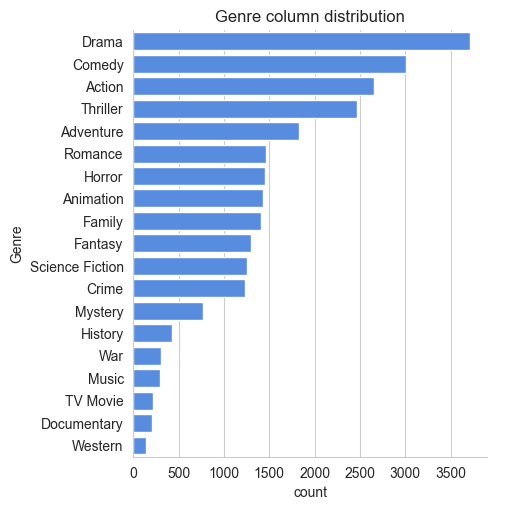

In [156]:
sns.catplot(y='Genre', data=df, kind='count', order=df['Genre'].value_counts().index, color='#4287f5')
plt.title("Genre column distribution")
plt.show()

Conculsion: Most movies released are from Drama and Comedy whereas Least released movie categories are western and documentary

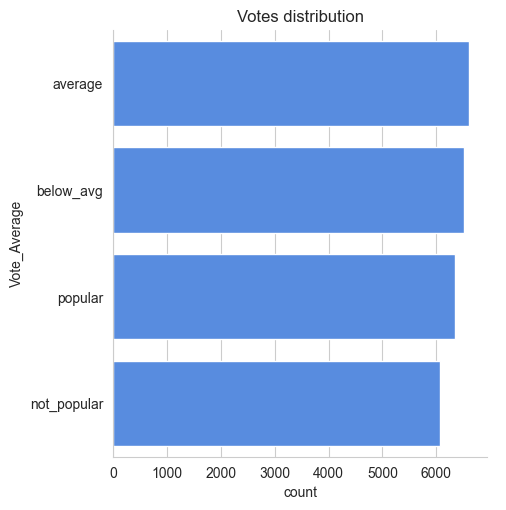

In [157]:
sns.catplot(y='Vote_Average', data=df, kind='count', order=df['Vote_Average'].value_counts().index, color='#4287f5')
plt.title("Votes distribution")
plt.show()

Conclusion: Average has highest vote in votes distribution

In [158]:
df[df['Popularity'] == df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021-12-15,Spider-Man: No Way Home,5083.954,8940,below_avg,Action
1,2021-12-15,Spider-Man: No Way Home,5083.954,8940,below_avg,Adventure
2,2021-12-15,Spider-Man: No Way Home,5083.954,8940,below_avg,Science Fiction


Conclusion: Spiderman was the most popular movie with action, adventure, science fiction genre

In [159]:
df[df['Popularity'] == df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021-03-31,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984-09-23,Threads,13.354,186,below_avg,War
25550,1984-09-23,Threads,13.354,186,below_avg,Drama
25551,1984-09-23,Threads,13.354,186,below_avg,Science Fiction


Conclusion: THe us vs billie holiday and Threads were the least popular movies having genre music,drama,history,war,sci fi

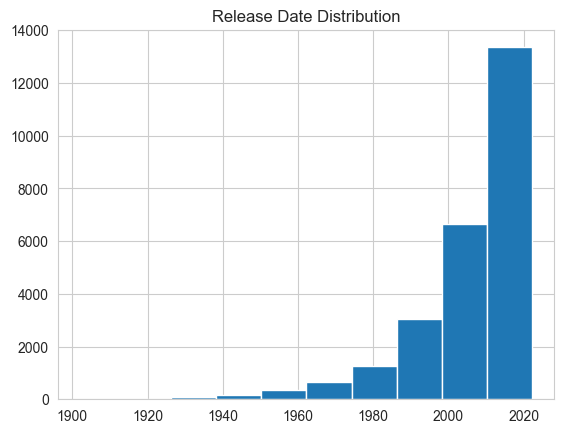

In [162]:
df['Release_Date'].hist()
plt.title('Release Date Distribution')
plt.show()


Conclusion: Highest number of films were filmed in 2020